# Introduction

**Principal Component Analysis (PCA)** is a **dimensionality reduction** technique commonly used in data analysis and machine learning. Its main goal is to transform a high-dimensional dataset into a lower-dimensional space while preserving as much of the **data's variance** (information) as possible.

---

### 🔍 Intuition

PCA finds new axes (called **principal components**) that are:

1. **Orthogonal** (uncorrelated) to each other.
2. **Ordered** by the amount of variance they capture:

   * The first principal component captures the **largest** variance.
   * The second, the next largest, and so on.

By projecting the data onto the first $k$ components, we obtain a lower-dimensional representation that retains the most informative features of the data.

---

### 🧠 Why Use PCA?

* Reduce **dimensionality** and simplify models.
* Remove **correlated** features.
* Visualize high-dimensional data in 2D or 3D.
* Speed up machine learning algorithms.
* Reduce **noise** in the data.

---

### 🧮 How It Works (Mathematical Steps)

Given a dataset $X \in \mathbb{R}^{m \times d}$:

1. Standardize (i.e., centralize and normalize) the data matrix $\mathbf{X}$
2. Compute $\Sigma$, the covariance matrix of $\mathbf{X}$: $\Sigma = \frac{1}{m-1}\sum_{i=i}^{m} \left(\mathbf{x^{(i)}} \cdot \mathbf{x^{(i)}}^T\right)$
3. Decompose $\Sigma$ using SVD: $\Sigma = U S V^T$. The principal components are the columns of the matrix $U$.
4. Select the $k$ columns of $U$ corresponding to the $k$ largest singular values of $S$. These columns are the $k$ principal components.
5. Construct the Projection Matrix: $W = \left[u_1, u_2, \ldots, u_k\right]$
6. Project the data matrix over the basis formed by $U$: $\mathbf{X}_{\text{projected}} = \mathbf{X}W$

---

### 🔧 Use With Caution

* PCA is **linear**: it can't capture non-linear patterns.
* Principal components are **hard to interpret**: they are combinations of original features.
* Sensitive to **scaling** of features.

# Toy Implementation

In [168]:
# %load ../src/pca.py
import numpy as np
from scipy import linalg as LA

def standardize(X):
    """
    Standardizes the input data matrix X to have zero mean and unit variance for each feature.

    Parameters:
    -----------
    X : numpy.ndarray
        A 2D array of shape (n_samples, n_features) representing the input data.

    Returns:
    --------
    standardized_X : numpy.ndarray
        A 2D array of the same shape as X, where each feature has zero mean and unit standard deviation.
    mean_X : numpy.ndarray
        A 1D array of shape (n_features,) containing the mean of each feature in the original data.
    std_X : numpy.ndarray
        A 1D array of shape (n_features,) containing the standard deviation of each feature in the original data.

    Notes:
    ------
    This function is often used as a preprocessing step before applying machine learning algorithms,
    especially those that are sensitive to the scale of the input data (e.g., PCA, SVM, k-NN).
    """
    mean_X = np.mean(X, axis=0)
    std_X = np.std(X, axis=0)
    standardized_X = (X - mean_X) / std_X
    return standardized_X, mean_X, std_X

def svd(Sigma):
    U, S, V = LA.svd(Sigma)
    return U, S, V

def pca(X, k):
    """
    Performs Principal Component Analysis (PCA) on the input data matrix X and projects it onto the top-k principal components.

    Parameters:
    -----------
    X : numpy.ndarray
        A 2D array of shape (n_samples, n_features) representing the input data.
    k : int
        The number of principal components to retain for dimensionality reduction.

    Returns:
    --------
    X_projected : numpy.ndarray
        A 2D array of shape (n_samples, k) representing the input data projected onto the top-k principal components.
    components : numpy.ndarray
        A 2D array of shape (n_features, k) containing the top-k principal component vectors (eigenvectors of the covariance matrix).

    Notes:
    ------
    This implementation computes the covariance matrix of X, performs Singular Value Decomposition (SVD) to obtain
    principal components, and projects the original data onto the subspace spanned by the top-k components.
    """
    Sigma = np.cov(X, rowvar=False)
    U, S, V = svd(Sigma)
    W = U[:, :k]
    X_projected = np.matmul(X, W)
    return X_projected, W

def reconstruct_data(X_projected, W):
    return np.matmul(X_projected, W.T)

Let us now test this toy implementation:

In [169]:
# Toy data matrix X (four data points, each one is 3D)
X = np.array([
        [0.387,  4878, 5.42],
        [0.723, 12104, 5.25],
        [1,     12756, 5.52],
        [1.524,  6787, 3.94],
    ])

# Display the oricinal data matrix
print("Original Data Matrix:")
print(X)

# Display the standardized data matrix
standardized_X, _, _ = standardize(X)
print("\nStandardized Data Matrix:")
print(standardized_X)

Original Data Matrix:
[[3.8700e-01 4.8780e+03 5.4200e+00]
 [7.2300e-01 1.2104e+04 5.2500e+00]
 [1.0000e+00 1.2756e+04 5.5200e+00]
 [1.5240e+00 6.7870e+03 3.9400e+00]]

Standardized Data Matrix:
[[-1.25237521 -1.2602333   0.60727372]
 [-0.44547575  0.88082256  0.34085686]
 [ 0.21973601  1.07400944  0.76398952]
 [ 1.47811494 -0.6945987  -1.7121201 ]]


In [170]:
Sigma = np.cov(standardized_X, rowvar = False)
print(f'\nCovariance matrix:\n{Sigma}')

U, S, V = svd(Sigma)

print('U:\n' + str(U))
print('S:\n' + str(S))
print('V:\n' + str(V))

# Sanity check: verifying that eivenvectors are indeed unit vectors
print('\nNorms of eigenvectors (columns of U):')
print(np.linalg.norm(U[:,0]), np.linalg.norm(U[:,1]), np.linalg.norm(U[:,2]))

print('dot:\n')
print(np.dot(U[:,0], U[:,1]))



Covariance matrix:
[[ 1.33333333  0.1317339  -1.09173744]
 [ 0.1317339   1.33333333  0.51489873]
 [-1.09173744  0.51489873  1.33333333]]
U:
[[-0.64926351 -0.42018576  0.63395648]
 [ 0.24566452 -0.90471598 -0.34804876]
 [ 0.71979569 -0.07023474  0.69062381]]
S:
[2.49382602 1.43448827 0.07168571]
V:
[[-0.64926351  0.24566452  0.71979569]
 [-0.42018576 -0.90471598 -0.07023474]
 [ 0.63395648 -0.34804876  0.69062381]]

Norms of eigenvectors (columns of U):
0.9999999999999997 0.9999999999999994 0.9999999999999999
dot:

-1.0408340855860843e-16


In [171]:
# Reduces the dimensionality from 3D to 2D.
k=2
X_projected, W = pca(standardized_X, k)
print('\nX_projected (k=' + str(k) + '):\n' + str(X_projected))
print('\nW (that is, truncated U):\n', str(W))



X_projected (k=2):
[[ 0.94063993  1.62373172]
 [ 0.7509653  -0.63365168]
 [ 0.6710958  -1.11766206]
 [-2.36270102  0.12758202]]

W (that is, truncated U):
 [[-0.64926351 -0.42018576]
 [ 0.24566452 -0.90471598]
 [ 0.71979569 -0.07023474]]


For a sanity check, let us reconstruct the original data matrix:

In [172]:
reconstruct_data(W, X_projected)
print('\nX_reconstructed:\n' + str(np.matmul(X_projected, W.T)))


X_reconstructed:
[[-1.29299213 -1.23793419  0.56302618]
 [-0.22132296  0.75776033  0.58504595]
 [ 0.03390767  1.17603116  0.56155057]
 [ 1.48040742 -0.6958573  -1.7096227 ]]


# Visualizing PCA's result on the Iris dataset

PCA Projected Data


,PC1,PC2
0,2.264703,-0.480027
1,2.080961,0.674134
2,2.364229,0.341908
3,2.299384,0.597395
4,2.389842,-0.646835


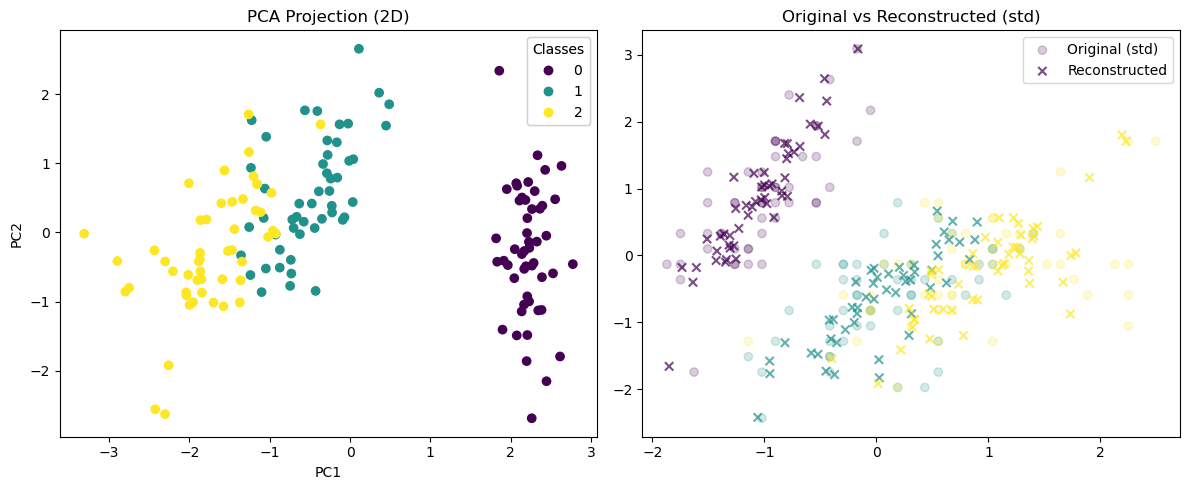

In [173]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset and standardize
iris = load_iris()
X, y = iris.data, iris.target
X_std, mean_X, std_X = standardize(X)

# Perform PCA
k = 2
X_proj, W = pca(X_std, k)

# Plot original standardized data and projected data
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# PCA Projection
scatter = axs[0].scatter(X_proj[:, 0], X_proj[:, 1], c=y, cmap='viridis')
axs[0].set_title('PCA Projection (2D)')
axs[0].set_xlabel('PC1')
axs[0].set_ylabel('PC2')
legend1 = axs[0].legend(*scatter.legend_elements(), title="Classes")
axs[0].add_artist(legend1)

# Reconstruction
X_reconst = reconstruct_data(X_proj, W)
axs[1].scatter(X_std[:, 0], X_std[:, 1], alpha=0.2, label='Original (std)', c=y, cmap='viridis')
axs[1].scatter(X_reconst[:, 0], X_reconst[:, 1], alpha=0.7, label='Reconstructed', c=y, cmap='viridis', marker='x')
axs[1].set_title('Original vs Reconstructed (std)')
axs[1].legend()

plt.tight_layout()

print("PCA Projected Data")
df = pd.DataFrame(X_proj, columns=["PC1", "PC2"])
df.head()

# Intuition around the SVD decomposition

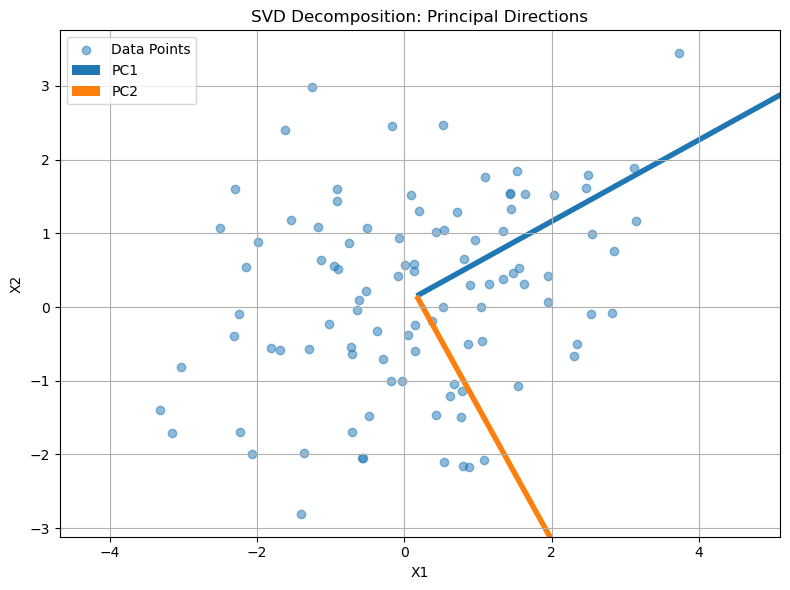

In [174]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd

# Generate a synthetic 2D dataset
np.random.seed(42)
mean = [0, 0]
cov = [[3, 1], [1, 2]]  # correlated features
X = np.random.multivariate_normal(mean, cov, 100)

# Compute SVD
X_mean = X.mean(axis=0)
X_centered = X - X_mean
U, S, VT = svd(X_centered)

# Plot original data and principal directions
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], alpha=0.5, label='Data Points')

# Principal directions (scaled by singular values)
origin = X_mean
for i in range(2):
    vec = VT[i] * S[i]  # scale direction by singular value
    ax.quiver(*origin, *vec, scale=5, color=f"C{i}", label=f"PC{i+1}")

ax.set_title('SVD Decomposition: Principal Directions')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.legend()
ax.axis('equal')
plt.grid(True)
plt.tight_layout()
plt.show()


The plot above provides intuition behind Singular Value Decomposition (SVD):

* The **scatter points** are from a 2D Gaussian distribution with correlated features.
* The **arrows** represent the principal directions (right singular vectors) scaled by the corresponding singular values, showing the directions of maximum variance:

  * The **first arrow (PC1)** points along the direction of maximum spread in the data.
  * The **second arrow (PC2)** is orthogonal to the first and captures the next most variance.

This geometric interpretation of SVD explains why it is foundational to PCA and dimensionality reduction.

# The SVD Decomposition (Geometric View)

Getting around *how* SVD finds these directions helps demystify PCA and a lot of linear algebra applications. Let’s build intuition step-by-step.

Given a **centered** data matrix $X \in \mathbb{R}^{n \times d}$ (with $n$ samples and $d$ features), SVD gives:

$$
X = U \Sigma V^\top
$$

Where:

* $U \in \mathbb{R}^{m \times m}$: Left singular vectors (directions in **data space**).
* $\Sigma \in \mathbb{R}^{m \times d}$: Diagonal matrix of **singular values** $\sigma_1 \ge \sigma_2 \ge \dots$.
* $V^\top \in \mathbb{R}^{d \times d}$: Right singular vectors (directions in **feature space**).

The key to understanding SVD geometrically is to realize that it **rotates and stretches** the space:

$$
\text{Each } \mathbf{v}_i \text{ (column of } V) \text{ gives a direction of max variance}
$$

---

### 🧠 How SVD Finds These Directions

Let’s say you want to find the direction $\mathbf{v}$ that **captures the most variance** when projecting the data:

#### 1. Maximize projected variance:

Project $X$ onto unit vector $\mathbf{v}$:

$$
\text{maximize } \| X \mathbf{v} \|^2 \quad \text{subject to } \|\mathbf{v}\| = 1
$$

$$
\Rightarrow \| X \mathbf{v} \|^2 = \mathbf{v}^\top X^\top X \mathbf{v}
$$

This is a **Rayleigh quotient**, maximized when $\mathbf{v}$ is the **eigenvector** of $X^\top X$ with the largest eigenvalue.

#### 2. That’s exactly what SVD does!

* $X^\top X = V \Sigma^\top \Sigma V^\top$ → has eigenvectors = right singular vectors $V$
* So **SVD finds directions $\mathbf{v}_1, \mathbf{v}_2, \ldots$** that maximize the projected variance one after another.

---

### 🧪 Let’s Visualize This

We’ll:

1. Compute $X^\top X$
2. Show its eigenvectors = principal directions
3. Compare them with the SVD result


In this plot:

* The **data points** are centered observations from the synthetic Gaussian dataset.
* The **arrows** represent the **eigenvectors of $X^\top X$** (which are the **right singular vectors** from SVD), scaled by the square roots of their corresponding eigenvalues (i.e., singular values).

These directions correspond to the axes along which the data has the most variance. SVD “discovers” them by solving the optimization problem:

$$
\max_{\|\mathbf{v}\| = 1} \|X\mathbf{v}\|^2
$$

which boils down to finding eigenvectors of $X^\top X$.

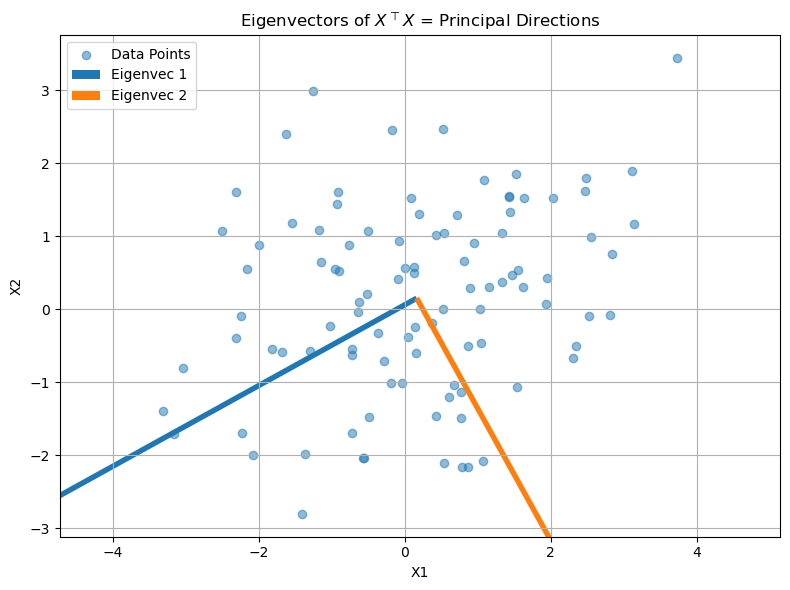

In [175]:
# Compute X^T X and its eigen-decomposition
XtX = X_centered.T @ X_centered
eig_vals, eig_vecs = np.linalg.eigh(XtX)  # use eigh because XtX is symmetric

# Sort eigenvalues and eigenvectors in descending order
sorted_idx = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[sorted_idx]
eig_vecs = eig_vecs[:, sorted_idx]

# Plot data and eigenvectors from X^T X
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], alpha=0.5, label='Data Points')

# Correct visualization of eigenvectors
for i in range(2):
    vec = eig_vecs[:, i] * np.sqrt(eig_vals[i])
    ax.quiver(*X_mean, *vec, scale=5, color=f"C{i}", label=f"Eigenvec {i+1}")

ax.set_title(r"Eigenvectors of $X^\top X$ = Principal Directions")
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.legend()
ax.axis('equal')
plt.grid(True)
plt.tight_layout()
plt.show()


The visualization below shows how **SVD projects data onto principal directions**:

* **Original data** points are in semi-transparent blue.
* The **projections onto PC1 and PC2** (principal components) are marked with crosses (`x`), aligned with the dominant axes of variance.
* The **arrows** indicate the directions of PC1 and PC2, scaled according to the variance they capture.

This demonstrates how PCA (via SVD) decomposes the data into orthogonal directions that capture the most variation. The projections are what PCA uses to reduce dimensionality.

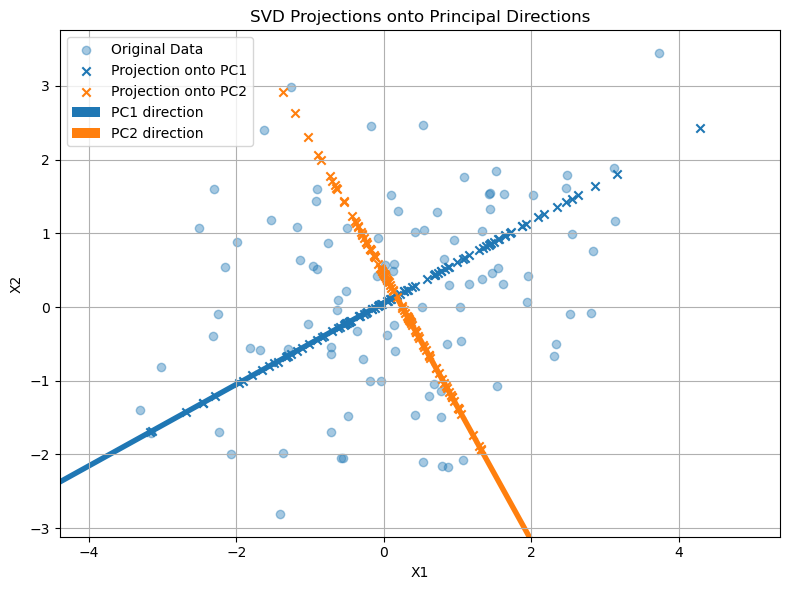

In [176]:
# Project data onto each principal direction (eigenvector)
X_proj_1 = X_centered @ eig_vecs[:, 0].reshape(-1, 1) @ eig_vecs[:, 0].reshape(1, -1)
X_proj_2 = X_centered @ eig_vecs[:, 1].reshape(-1, 1) @ eig_vecs[:, 1].reshape(1, -1)

# Add mean back to projected points for visualization in original coordinate system
X_proj_1 += X_mean
X_proj_2 += X_mean

# Plot original data and its projections
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], alpha=0.4, label='Original Data')
ax.scatter(X_proj_1[:, 0], X_proj_1[:, 1], color='C0', marker='x', label='Projection onto PC1')
ax.scatter(X_proj_2[:, 0], X_proj_2[:, 1], color='C1', marker='x', label='Projection onto PC2')

# Add arrows for directions
for i in range(2):
    vec = eig_vecs[:, i] * np.sqrt(eig_vals[i])
    ax.quiver(*X_mean, *vec, scale=5, color=f"C{i}", label=f"PC{i+1} direction")

ax.set_title("SVD Projections onto Principal Directions")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.legend()
ax.axis("equal")
plt.grid(True)
plt.tight_layout()
plt.show()


# Maximizing $\| X \mathbf{v} \|^2$?

The code below provide intuition about why maximizing $\| X \mathbf{v} \|^2$ finds the direction with greatest variance.

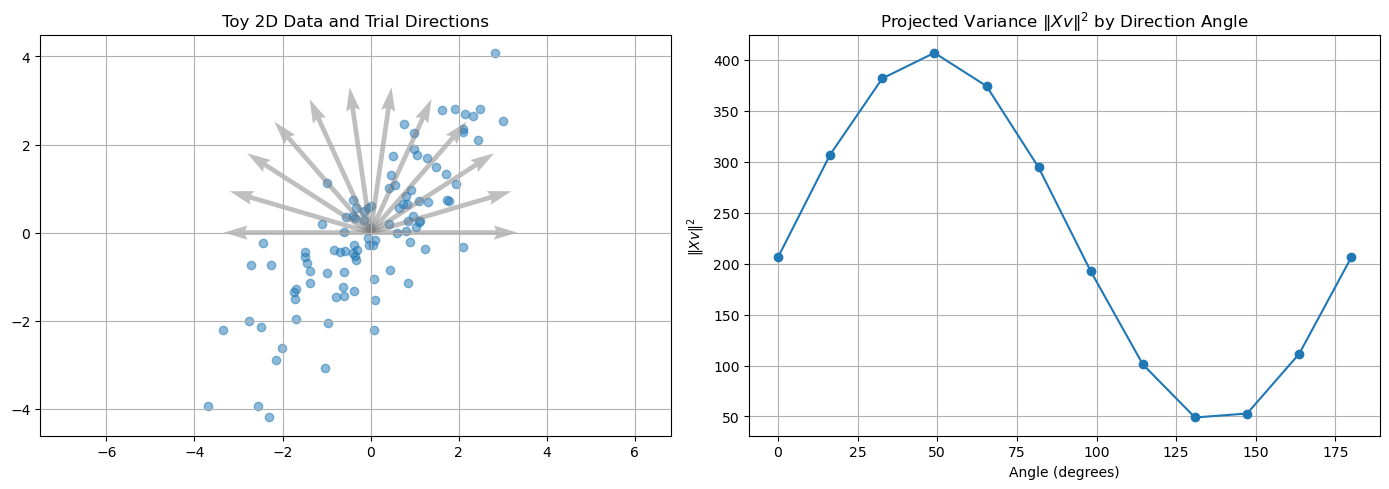

In [177]:
# Create a simple 2D toy dataset
np.random.seed(1)
X_toy = np.random.multivariate_normal([0, 0], [[3, 2.5], [2.5, 3]], size=100)

# Center the data
X_centered_toy = X_toy - X_toy.mean(axis=0)

# Choose a few arbitrary unit directions to test projection magnitude (variance)
angles = np.linspace(0, np.pi, 12)
directions = np.array([[np.cos(a), np.sin(a)] for a in angles])

# Compute ||Xv||^2 for each direction
variances = [np.linalg.norm(X_centered_toy @ v)**2 for v in directions]

# Normalize to unit length to ensure it's the true Rayleigh quotient
variances = np.array(variances)

# Plot the dataset and some directions
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Left plot: data + test directions
ax[0].scatter(X_centered_toy[:, 0], X_centered_toy[:, 1], alpha=0.5, label='Data')
origin = np.array([0, 0])
for i, v in enumerate(directions):
    ax[0].quiver(*origin, *v, angles='xy', scale_units='xy', scale=0.3, color='gray', alpha=0.5)
ax[0].set_title("Toy 2D Data and Trial Directions")
ax[0].axis("equal")
ax[0].grid(True)

# Right plot: variance in each direction
ax[1].plot(np.degrees(angles), variances, marker='o')
ax[1].set_xlabel("Angle (degrees)")
ax[1].set_ylabel(r"$\|Xv\|^2$")
ax[1].set_title(r"Projected Variance $\|Xv\|^2$ by Direction Angle")
ax[1].grid(True)

plt.tight_layout()
plt.show()


The visualization above builds intuition for why maximizing $\|X\mathbf{v}\|^2$ finds the direction of greatest variance:

* **Left plot**: A 2D toy dataset with multiple trial directions $\mathbf{v}$ (gray arrows). Each direction is a unit vector.
* **Right plot**: Shows the value of $\|X\mathbf{v}\|^2$ (i.e., total variance captured when projecting onto $\mathbf{v}$) as a function of the angle of $\mathbf{v}$.

### Key Insight:

The direction that **maximizes** $\|X\mathbf{v}\|^2$ corresponds to the **first principal component**, because projecting the data onto this direction captures the **most spread** — i.e., the most variance.

This is the heart of PCA and SVD:

* Find the direction $\mathbf{v}$ that stretches the data the most when projected.
* This is equivalent to solving an eigenvalue problem on $X^\top X$.

# 🔁 What is $X\mathbf{v}$ Geometrically?

Let’s now deepen the **geometric meaning** of why maximizing $\|X\mathbf{v}\|^2$ finds the direction of greatest variance — using a mix of math intuition and visual reasoning.

Let:

* $X \in \mathbb{R}^{n \times d}$ be a **centered** data matrix (each row is a data point),
* $\mathbf{v} \in \mathbb{R}^d$ be a **unit vector**.

Then:

$$
X\mathbf{v} \in \mathbb{R}^n
$$

is a **column vector of projected values**: for each row $\mathbf{x}_i$ of $X$, we compute the projection $\mathbf{x}_i \cdot \mathbf{v}$.

---

### 🎯 What Does $\|X\mathbf{v}\|^2$ Mean?

$$
\|X\mathbf{v}\|^2 = \sum_{i=1}^n (\mathbf{x}_i \cdot \mathbf{v})^2
$$

This is the **sum of squared projections** onto direction $\mathbf{v}$. In other words, it's the **variance (times $n$)** of the data when projected onto $\mathbf{v}$.

So maximizing $\|X\mathbf{v}\|^2$ **means**:

> Find the direction along which the data spreads the most.

---

### 📐 Visual Meaning (2D Intuition)

Imagine this process:

1. You project all points onto a line (through the origin) in direction $\mathbf{v}$.
2. You now only have scalar values: the coordinates of points **on that line**.
3. Some directions produce short, tightly clustered projections (low variance).
4. One direction produces the **longest spread** — this is the **first principal component**.

Think of shining a flashlight:

* Shine from many angles.
* Measure how “long” the shadow is on the opposite wall.
* The direction that gives the **longest shadow** is the first principal component.

---

### 🧠 Algebraic Connection

Let’s recall:

$$
\|X\mathbf{v}\|^2 = \mathbf{v}^\top X^\top X \mathbf{v}
$$

This is a **Rayleigh quotient**. It reaches its **maximum** when $\mathbf{v}$ is the **eigenvector corresponding to the largest eigenvalue** of $X^\top X$. That eigenvalue tells us **how much variance** is explained in that direction.